In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
)

In [2]:
df = pd.read_csv('/home/isatish/projects/ab_testing_simulation/data/ab_merged_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [ ]:
# select useful columns and drop missing values
cols = ["group", "converted", "country"]
df = df[cols].dropna()

In [5]:
# edcode target variable
df["converted"] = df["converted"].astype(int)

In [4]:
# split data into training and testing sets
X = df[["group", "country"]]
y = df["converted"]

In [6]:
categorical_features = ["group", "country"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(drop="first"), categorical_features)]
)

In [7]:
# build model pipeline
log_reg = LogisticRegression(max_iter = 1000)
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", log_reg)])

In [10]:
# pipeline steps
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
pipeline.fit(X_train, y_train) #fit model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
# predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     51849
           1       0.00      0.00      0.00      7047

    accuracy                           0.88     58896
   macro avg       0.44      0.50      0.47     58896
weighted avg       0.78      0.88      0.82     58896



/home/isatish/.pyenv/versions/ds/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/isatish/.pyenv/versions/ds/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/isatish/.pyenv/versions/ds/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [13]:
# roc auc
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.5007


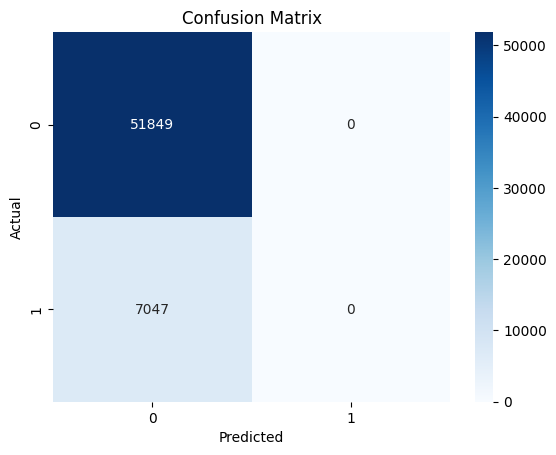

In [16]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

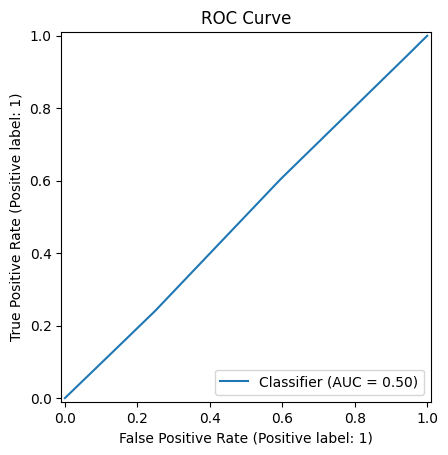

In [17]:
# roc curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()

In [ ]:
# feature importance
encoder = pipeline.named_steps["preprocessor"].named_transformers_["cat"]
feature_names = encoder.get_feature_names_out(categorical_features)
coefs = pipeline.named_steps["classifier"].coef_[0]
importance = pd.DataFrame({"Feature": feature_names, "Coefficient": coefs})
importance.sort_values("Coefficient", ascending=False, inplace=True)
print(importance)

           Feature  Coefficient
1       country_UK     0.062492
2       country_US     0.038970
0  group_treatment    -0.004595
